In [2]:
import numpy as np
import maze as mz 

In [3]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 2, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [4]:
env = mz.Maze(maze)

States  {0: ((0, 0), (0, 1)), 1: ((0, 0), (0, 2)), 2: ((0, 0), (0, 3)), 3: ((0, 0), (0, 4)), 4: ((0, 0), (0, 5)), 5: ((0, 0), (0, 6)), 6: ((0, 0), (1, 0)), 7: ((0, 0), (1, 1)), 8: ((0, 0), (1, 2)), 9: ((0, 0), (1, 3)), 10: ((0, 0), (1, 4)), 11: ((0, 0), (1, 5)), 12: ((0, 0), (1, 6)), 13: ((0, 0), (2, 0)), 14: ((0, 0), (2, 1)), 15: ((0, 0), (2, 2)), 16: ((0, 0), (2, 3)), 17: ((0, 0), (2, 4)), 18: ((0, 0), (2, 5)), 19: ((0, 0), (2, 6)), 20: ((0, 0), (3, 0)), 21: ((0, 0), (3, 1)), 22: ((0, 0), (3, 2)), 23: ((0, 0), (3, 3)), 24: ((0, 0), (3, 4)), 25: ((0, 0), (3, 5)), 26: ((0, 0), (3, 6)), 27: ((0, 0), (4, 0)), 28: ((0, 0), (4, 1)), 29: ((0, 0), (4, 2)), 30: ((0, 0), (4, 3)), 31: ((0, 0), (4, 4)), 32: ((0, 0), (4, 5)), 33: ((0, 0), (4, 6)), 34: ((0, 0), (5, 0)), 35: ((0, 0), (5, 1)), 36: ((0, 0), (5, 2)), 37: ((0, 0), (5, 3)), 38: ((0, 0), (5, 4)), 39: ((0, 0), (5, 5)), 40: ((0, 0), (5, 6)), 41: ((0, 1), (0, 0)), 42: ((0, 1), (0, 2)), 43: ((0, 1), (0, 3)), 44: ((0, 1), (0, 4)), 45: ((0, 1)

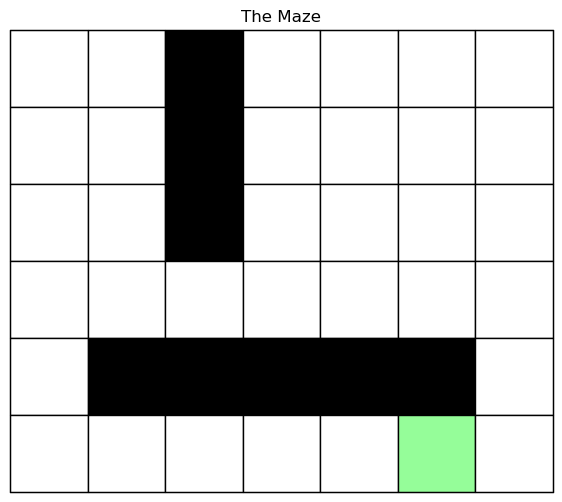

In [5]:
mz.draw_maze(maze)

In [6]:
# Finite horizon
horizon = 15
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming_minotaur(env,horizon);

Rewards shape [s,a] (1355, 5)
Transition prob shape [s,s,a] (1355, 1355, 5)
V: [  -1.   -1.   -1. ...   -1. -200.    0.]
policy at T, action that max the rewards at the end [0. 0. 0. ... 0. 0. 0.]


In [7]:
policy[34,horizon]

0.0

0

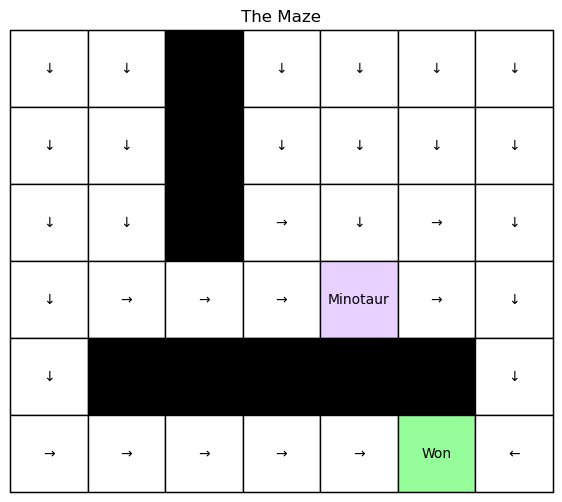

In [8]:
minotaur = (3,4)
time = 4
mz.draw_policy(env, minotaur, policy, time)

In [9]:
print(policy[:, horizon])

[0. 0. 0. ... 0. 0. 0.]


In [10]:

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
minotaur_start= (5,5);
path, minotaur_path = env.simulate_minotaur(start, minotaur_start, policy, method);

WON


In [11]:
print(path)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


In [12]:
print(minotaur_path)

[(5, 5), (4, 5), (3, 5), (3, 6), (3, 5), (3, 4), (4, 4), (3, 4), (3, 3), (2, 3), (1, 3)]


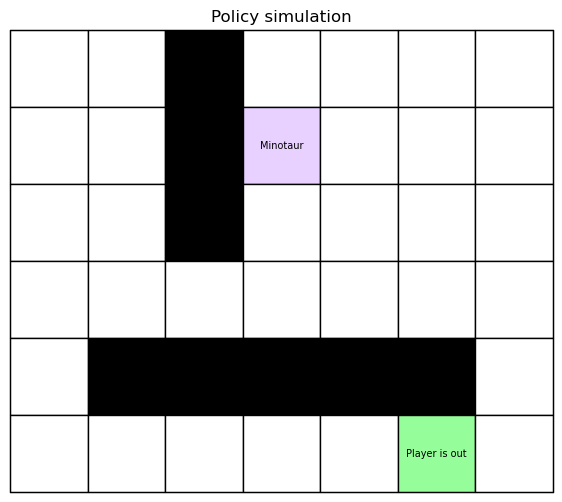

In [13]:
# Show the shortest path 
mz.animate_solution(maze, path, minotaur_path)